<a href="https://colab.research.google.com/github/coderzaman/Knowledge-Engineering/blob/master/Knowledge_Engineering_Lab_Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Metrics Calculation
- Define a graph G as a list of nodes and edges.
- Calculate the total number of edges in the graph.
- Calculate the shortest distance between all pairs of nodes.
- Eccentricity of Each Node
- Calculate the shortest path between all pairs of nodes.

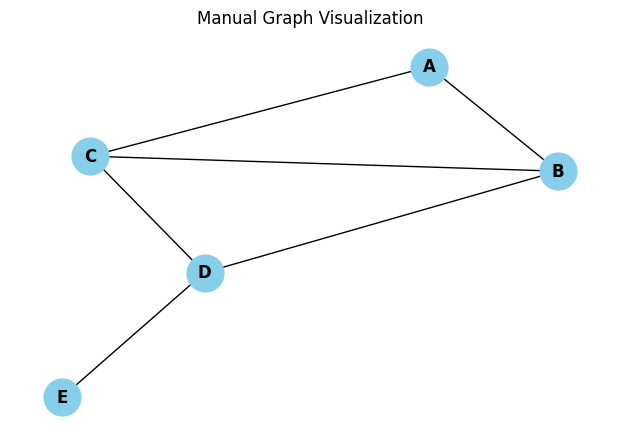

Total number of edges: 6
-------------------------
Shortest Distances Between All Pairs:
  From Node A:
    -> To A: 0
    -> To B: 1
    -> To C: 1
    -> To D: 2
    -> To E: 3
  From Node B:
    -> To B: 0
    -> To A: 1
    -> To C: 1
    -> To D: 1
    -> To E: 2
  From Node C:
    -> To C: 0
    -> To A: 1
    -> To B: 1
    -> To D: 1
    -> To E: 2
  From Node D:
    -> To D: 0
    -> To B: 1
    -> To C: 1
    -> To E: 1
    -> To A: 2
  From Node E:
    -> To E: 0
    -> To D: 1
    -> To B: 2
    -> To C: 2
    -> To A: 3
-------------------------
Eccentricity of Each Node:
  e(A) = 3
  e(B) = 2
  e(C) = 2
  e(D) = 2
  e(E) = 3
-------------------------
Shortest Paths Between All Pairs:
  From Node A:
    -> To B: A -> B
    -> To C: A -> C
    -> To D: A -> B -> D
    -> To E: A -> B -> D -> E
  From Node B:
    -> To A: B -> A
    -> To C: B -> C
    -> To D: B -> D
    -> To E: B -> D -> E
  From Node C:
    -> To A: C -> A
    -> To B: C -> B
    -> To D: C -> D
    -> T

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Define a graph G with the specified nodes and edges
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]

# Create the graph and add the nodes and edges
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# --- Visualize the Graph ---
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=31) # Use a seed for reproducible layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
plt.title("Manual Graph Visualization")
plt.show()


# 1. Calculate the total number of edges in the graph
num_edges = G.number_of_edges()
print(f"Total number of edges: {num_edges}")
print("-" * 25)


# 2. Calculate the shortest distance between all pairs of nodes
all_distances = dict(nx.all_pairs_shortest_path_length(G))

print("Shortest Distances Between All Pairs:")
for source, targets in all_distances.items():
    print(f"  From Node {source}:")
    for target, distance in targets.items():
        print(f"    -> To {target}: {distance}")
print("-" * 25)


# 3. Calculate the eccentricity of each node
if nx.is_connected(G):
    eccentricities = nx.eccentricity(G)
    print("Eccentricity of Each Node:")
    for node, ecc in eccentricities.items():
        print(f"  e({node}) = {ecc}")
    print("-" * 25)
else:
    print("Graph is disconnected, so eccentricity is infinite for all nodes.")
    print("-" * 25)


# 4. Calculate the shortest path between all pairs of nodes
all_paths = dict(nx.all_pairs_shortest_path(G))

print("Shortest Paths Between All Pairs:")
for source, targets in all_paths.items():
    print(f"  From Node {source}:")
    for target, path in targets.items():
        # Don't print the path from a node to itself
        if source != target:
            print(f"    -> To {target}: {' -> '.join(map(str, path))}")
print("-" * 25)



# Distance Matrix
- Create a distance matrix for the graph.
- Identify the radius of the graph (minimum eccentricity).
- Find the diameter of the graph (maximum eccentricity).
- Identify the center (nodes with smallest eccentricity) and the periphery (nodes with largest eccentricity).

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# 1) compute all-pairs shortest path lengths (unweighted)
lengths_dict = dict(nx.all_pairs_shortest_path_length(G))

# 2) fix node order and prepare distance matrix
nodes = list(G.nodes())
n = len(nodes)
D = np.full((n, n), np.inf, dtype=float)

# Fill matrix
for i, u in enumerate(nodes):
    D[i, i] = 0.0
    dist_from_u = lengths_dict.get(u, {})
    for v, d in dist_from_u.items():
        j = nodes.index(v)
        D[i, j] = float(d)

# Pretty DataFrame view
dist_df = pd.DataFrame(D, index=nodes, columns=nodes)
print("Distance matrix:")
print(dist_df)

# 3) eccentricity of each node: maximum finite distance from that node
eccentricities = {}
for i, u in enumerate(nodes):
    row = D[i, :]
    finite = row[np.isfinite(row)]
    if finite.size == 0:
        ecc = np.inf
    else:
        ecc = float(np.max(finite))
    eccentricities[u] = ecc

print("\nEccentricities:")
for u in nodes:
    print(f"Node {u}: {eccentricities[u]}")

# 4) radius (minimum eccentricity) and diameter (maximum eccentricity)
radius = min(eccentricities.values())
diameter = max(eccentricities.values())
print(f"\nRadius (min eccentricity): {radius}")
print(f"Diameter (max eccentricity): {diameter}")

# 5) center (nodes with eccentricity == radius) and periphery (ecc == diameter)
center = [u for u, e in eccentricities.items() if e == radius]
periphery = [u for u, e in eccentricities.items() if e == diameter]

print(f"Center nodes: {center}")
print(f"Periphery nodes: {periphery}")




Distance matrix:
     A    B    C    D    E
A  0.0  1.0  1.0  2.0  3.0
B  1.0  0.0  1.0  1.0  2.0
C  1.0  1.0  0.0  1.0  2.0
D  2.0  1.0  1.0  0.0  1.0
E  3.0  2.0  2.0  1.0  0.0

Eccentricities:
Node A: 3.0
Node B: 2.0
Node C: 2.0
Node D: 2.0
Node E: 3.0

Radius (min eccentricity): 2.0
Diameter (max eccentricity): 3.0
Center nodes: ['B', 'C', 'D']
Periphery nodes: ['A', 'E']


# Subgraphs and Graph Coloring
- Extract induced subgraphs based on a set of nodes.
- Calculate the chromatic number of the complete bipartite graph K3,4

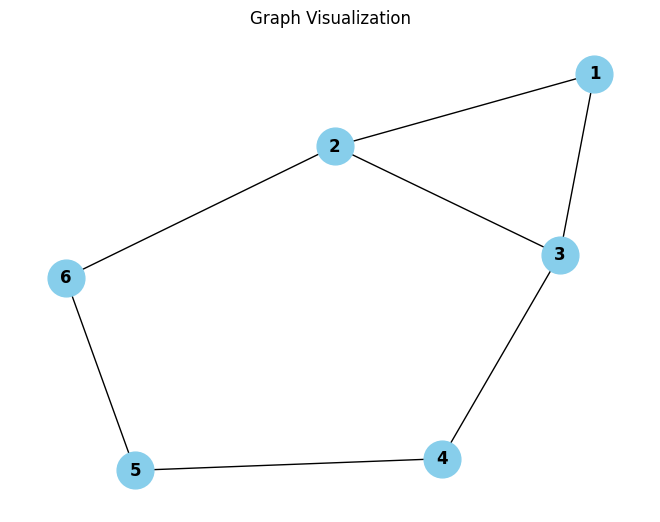

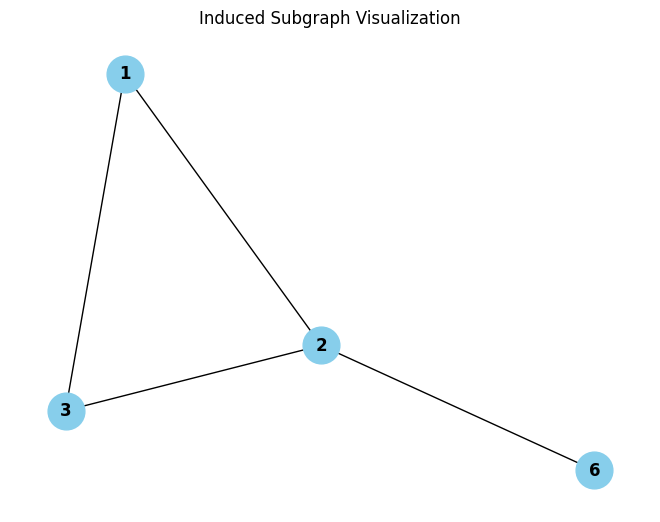

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Example graph (replace with your G)
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(2,6)])  # sample


pos = nx.spring_layout(G, seed=31) # Use a seed for consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

# choose a set of nodes for the induced subgraph
selected_nodes = [1,2,3,6]

# build induced subgraph (copy so it is independent of G)
H = G.subgraph(selected_nodes).copy()

pos = nx.spring_layout(H, seed=31) # Use a seed for consistent layout
nx.draw(H, pos, with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
plt.title("Induced Subgraph Visualization")
plt.show()


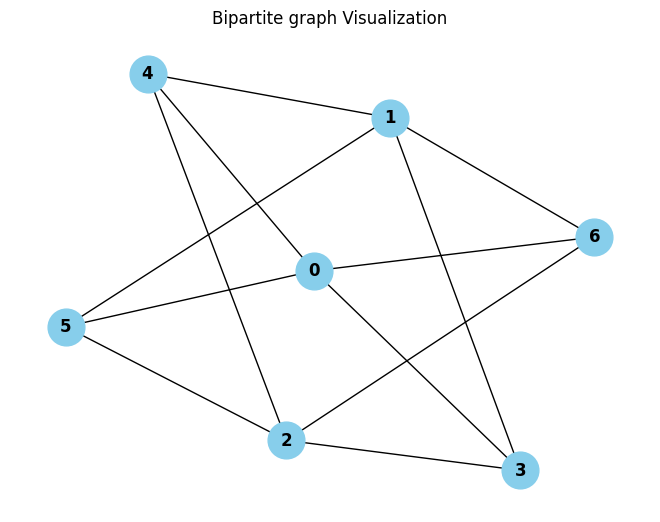

Number of colors used: 2


In [ ]:
# build K3,4
K = nx.complete_bipartite_graph(3, 4)  # partitions sizes 3 and 4

pos = nx.spring_layout(K, seed=31) # Use a seed for consistent layout
nx.draw(K, pos, with_labels=True, node_color='skyblue', node_size=700, font_weight='bold')
plt.title("Bipartite graph Visualization")
plt.show()

# greedy coloring (not guaranteed optimal always, but for bipartite it will return 2)
coloring = nx.coloring.greedy_color(K, strategy='largest_first')

# number of colors used (colors are 0..)
num_colors = max(coloring.values()) + 1


print("Number of colors used:", num_colors)
